In [5]:
import numpy as np 

def func_f(b, m):
    return m - np.tanh(b*m)
    
def func_g(b, m, q):
    return q - np.tanh(b*m)**2
    

def J_11(b, m):
    return 1 - (b / (np.cosh(b*m)**2))

    
def J_12(b, m):
    return 0

    
def J_21(b, m):
    return 2 * (b / np.cosh(b*m)**2)
    
    
def J_22(b, m):
    return 1

def createJMatrics(b, m):
    return np.array([
        [J_11(b, m), J_12(b, m)],
        [J_21(b, m), J_22(b, m)],
    ])

In [11]:
min = pow(10, -5)

T_arr = np.linspace(0.1, 1.2, 100)
result_arr = []

for i in range(len(T_arr)):
    b = 1/T_arr[i]
    # 初期値
    m = 0.5
    q = 0.5
    
    while True:
        f_g_matrics = np.array([
            [func_f(b, m)], 
            [func_g(b, m, q)]
        ])
        J_matrics = createJMatrics(b, m)
        
        delta = np.dot(np.linalg.inv(J_matrics), f_g_matrics)
        
        if abs(delta[0][0]) < min and abs(delta[1][0]) < min:
            result_arr.append([T_arr[i], m, q])
            break
        
        m = m - delta[0][0]
        q = q - delta[1][0]

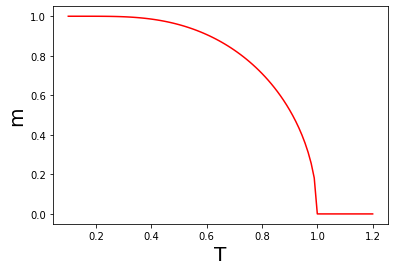

In [15]:
result_arr = np.array(result_arr)

result_arr_t = result_arr[:, 0]
result_arr_m = result_arr[:, 1]
result_arr_q = result_arr[:, 2]

import matplotlib.pyplot as plt

fig = plt.figure()
ax_3 = fig.add_subplot(111)

ax_3.set_xlabel("T", size = 20)
ax_3.set_ylabel("m", size = 20)

ax_3.plot(result_arr_t, result_arr_m, color="red")
plt.show()